In [2]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import os
import numpy as np
def set_custom_seaborn_style():
    custom_params = {
        "axes.facecolor": "white",
        "grid.color": "#e6e6e6",
        "grid.linestyle": "--",
        "axes.edgecolor": "#cccccc",
        "axes.labelsize": 14,
        "axes.titlesize": 16,
        "xtick.labelsize": 12,
        "ytick.labelsize": 12,
        "xtick.color": "#555555",
        "ytick.color": "#555555",
        "legend.frameon": False,
        "legend.fontsize": 12,
        "font.family": "sans-serif",
        "font.sans-serif": ["Arial", "Helvetica", "DejaVu Sans"],
    }
    sns.set_theme(style="whitegrid", rc=custom_params)

set_custom_seaborn_style()

In [24]:
df = pd.read_csv('../../data/exam_approach/test_results/claude-3-7-sonnet-20250219/scores_61.csv', index_col=0)
#df.set_index("task_id", inplace=True)  # Set task_id as the index


# fitler valid exams
df = df[df['exam'] !='Exam not valid']
df.shape

(52, 57)

In [25]:
len(df['task_id'].unique())

52

<Axes: ylabel='Unnamed: 0.2'>

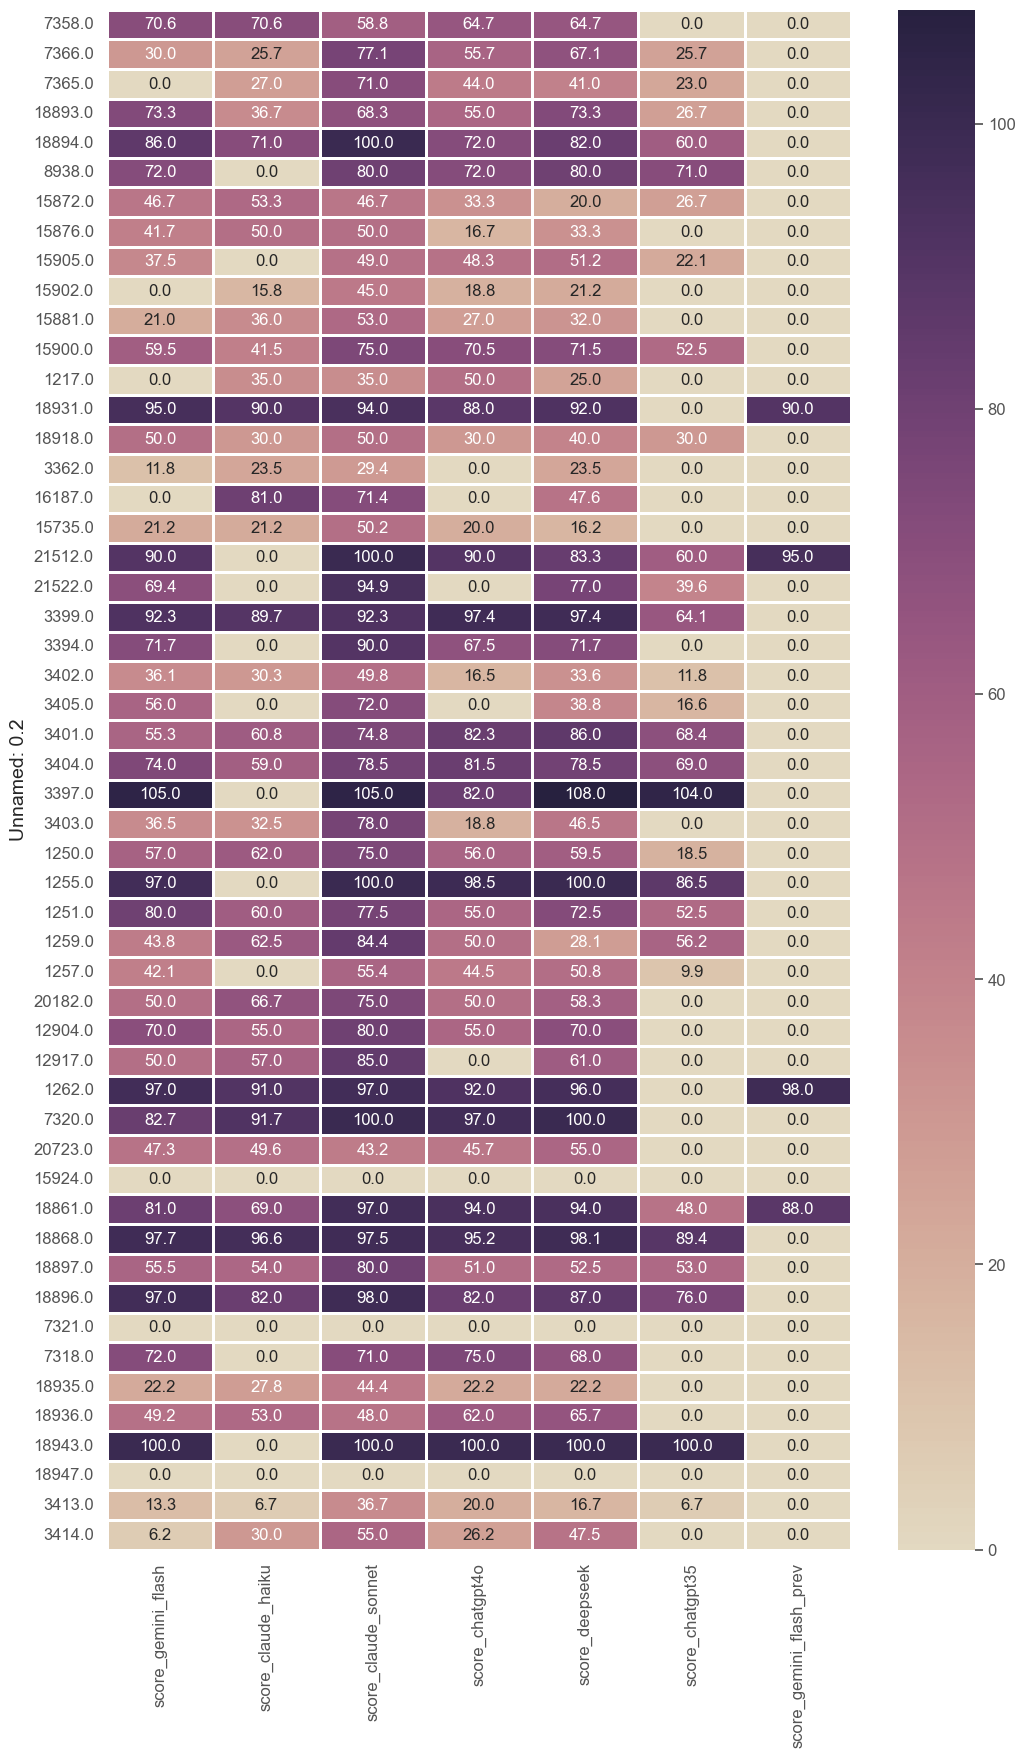

In [ ]:
df = df[df['exam'] !='Exam not valid']


score_cols = [col for col in df.columns if col.startswith('score')]
score_cols.append('task_id')
df_algorithms = df[score_cols].copy()
df_algorithms = df_algorithms.fillna(0)

# Create the heatmap
plt.figure(figsize=(12, 20))

# Create the heatmap
sns.heatmap(
    df_algorithms.drop(columns='task_id'),  # Drop the occupation column from the data itself
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), annot=True, fmt=".1f", linewidths=1, linecolor='white',
    xticklabels=df_algorithms.columns[:-1],  # Exclude the 'occupation' column for x-ticks
    yticklabels=df_algorithms['task_id'],  # Use occupation as the y-tick labels
)

In [4]:

# Sort dataframe by 'occupation' to group task IDs accordingly
df_sorted = df.sort_values(by='occupation')
# Group by 'occupation' and create a new column that indicates if the entry is the first in the group
df_sorted['is_first_in_group'] = df_sorted.groupby('occupation').cumcount() == 0


# Select only the algorithm score columns
df_algorithms = df_sorted[['score_chatgpt35', 'score_chatgpt4o', 'score_claude', 'score_gemini', 'score_deepseek']].\
rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'})

# Handle missing values by filling them with 0 (or another method like forward-fill)
df_algorithms = df_algorithms.fillna(0)

# Add a new column for occupation to use as row labels
df_algorithms['occupation'] = df_sorted['is_first_in_group'] * df_sorted['occupation']

# Create the heatmap
plt.figure(figsize=(12, 8))

# Create the heatmap
sns.heatmap(
    df_algorithms.drop(columns='occupation'),  # Drop the occupation column from the data itself
    cmap=sns.color_palette("ch:s=-.2,r=.6", as_cmap=True), annot=True, fmt=".1f", linewidths=1, linecolor='white',
    xticklabels=df_algorithms.columns[:-1],  # Exclude the 'occupation' column for x-ticks
    yticklabels=df_algorithms['occupation'],  # Use occupation as the y-tick labels
)

# Now, let's add horizontal lines with different colors
ax = plt.gca()

# Iterate through the rows and add black lines for new occupation start
for i in range(1, len(df_algorithms)):
    if df_sorted['occupation'].iloc[i] != df_sorted['occupation'].iloc[i-1]:
        ax.axhline(i, color='white', linewidth=5)  # Add black horizontal line between occupations

# Add title and axis labels
plt.title("Algorithm Performance Across Tasks", fontsize=16)
plt.xlabel("Algorithm", fontsize=12)
plt.ylabel("Occupation (Task ID)", fontsize=12)

# Rotate x-axis labels for readability
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Show the plot
plt.show()

KeyError: "['score_claude', 'score_gemini'] not in index"

In [87]:
df_algorithms

,GPT-3.5,GPT-4o,Claude 3.7 Sonnet,Gemini 2.0 Flash,DeepSeek Chat,occupation
task_id,,,,,,
12865.0,0.000000,100.0,100.0,0.0,100.000000,"Agents and Business Managers of Artists, Perfo..."
12883.0,0.000000,0.0,0.0,0.0,0.000000,"Buyers and Purchasing Agents, Farm Products"
21417.0,0.000000,0.0,0.0,0.0,0.000000,"Claims Adjusters, Examiners, and Investigators"
1158.0,0.000000,0.0,87.5,70.0,85.000000,"Purchasing Agents, Except Wholesale, Retail, a..."
1152.0,0.000000,0.0,0.0,0.0,0.000000,
1157.0,0.000000,0.0,0.0,0.0,0.000000,
1153.0,0.000000,0.0,0.0,0.0,0.000000,
1144.0,0.000000,87.4,91.4,0.0,87.400000,
1151.0,0.000000,0.0,0.0,0.0,0.000000,


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_90016/2186967654.py:83: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(df_algorithms['occupation'])  # Set the y-ticks to be the task descriptions


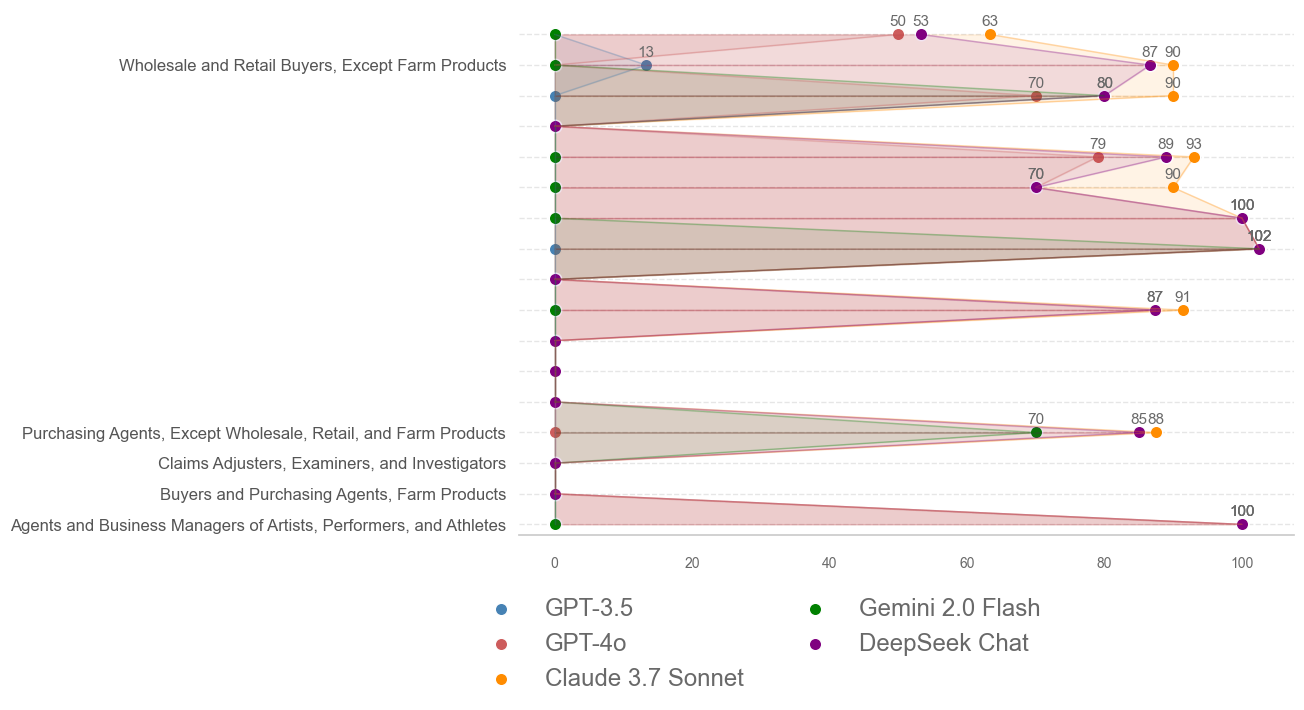

In [144]:


# Sort dataframe by 'occupation' to group task IDs accordingly
df_sorted = df.sort_values(by='occupation')
# Group by 'occupation' and create a new column that indicates if the entry is the first in the group
df_sorted['is_first_in_group'] = df_sorted.groupby('occupation').cumcount() == 0

# Select only the algorithm score columns
df_algorithms = df_sorted[['score_chatgpt35', 'score_chatgpt4o', 'score_claude', 'score_gemini', 'score_deepseek','task_description']].\
rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'})

# Handle missing values by filling them with 0 (or another method like forward-fill)
df_algorithms = df_algorithms.fillna(0)
# Add a new column for occupation to use as row labels
df_algorithms['occupation'] = np.where(df_sorted['is_first_in_group'] == 1, df_sorted['occupation'], ' ')

# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(10, 7))

# Color palette to choose from
darkblue = "#1f253f"
lightblue = "#58849f"
redish = "#d73027"

# Dot size
DOT_SIZE = 80

# Models and colors
models = ['GPT-3.5', 'GPT-4o', 'Claude 3.7 Sonnet', 'Gemini 2.0 Flash',
       'DeepSeek Chat']
colors = ['steelblue', 'indianred', 'darkorange', 'green', 'purple']

# Plot dots for each model
for i, model in enumerate(models):
    ax.scatter(
        x=df_algorithms[model],
        y=df_algorithms['task_description'],
        s=DOT_SIZE,
        alpha=1,
        color=colors[i],
        label=model,
        edgecolors="white",
    )
    # Connect dots with lines
    for idx in range(1, len(df_algorithms)):
        ax.plot(
            [df_algorithms[model].iloc[idx-1], df_algorithms[model].iloc[idx]],  # x-values
            [df_algorithms['task_description'].iloc[idx-1], df_algorithms['task_description'].iloc[idx]],  # y-values
            color=colors[i],
            alpha=0.3,  # Line transparency
            lw=1,  # Line width
        )
        ax.fill_betweenx(
            [task_desc_to_index[df_algorithms['task_description'].iloc[idx-1]], task_desc_to_index[df_algorithms['task_description'].iloc[idx]]],  # y-values (task description index)
            0,  # x-value on the left axis
            [df_algorithms[model].iloc[idx-1], df_algorithms[model].iloc[idx]],  # x-values
            color=colors[i],  # Fill color
            alpha=0.1,  # Transparency of the fill
        )
    # Add text labels for each model value
    for j, value in enumerate(df_algorithms[model]):
        
        location = df_algorithms.index[j]
        task_desc_to_index = {task: idx for idx, task in enumerate(df_algorithms['task_description'].unique())}

        ax.text(
            x=value,
            y=task_desc_to_index[df_algorithms.loc[location, 'task_description']] + 0.4,  # Add offset to the index to move text higher
            s=f"{round(value)}" if value!=0 else '',  # Round to nearest integer
            horizontalalignment="center",
            verticalalignment="center",
            size=11,
            color="dimgrey",
            weight="medium",
            #bbox=dict(facecolor='white', edgecolor='none', boxstyle='round,pad=0.01')
        )
       
# Remove y-tick labels (because task descriptions are already in the plot)
#ax.set_yticklabels([])

# # Add title and labels
# ax.set_xlabel('Model Scores', labelpad=10, size=14)
# ax.set_ylabel('Task Description', labelpad=10, size=14)
# # Adjust the distance between the y-ticks (compact the space)
ax.set_yticklabels(df_algorithms['occupation'])  # Set the y-ticks to be the task descriptions
#ax.yaxis.set_tick_params(pad=-10)  # Reduce the padding between the ticks
# Grid and spines settings
ax.grid(axis='x')
ax.spines["top"].set_visible(False)
ax.spines["bottom"].set_position(('outward', -10))
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)

# # Set xticks for readability
ax.tick_params(axis="x", pad=10, labelsize=10, labelcolor="dimgrey")

# # Create the legend
ax.legend(
    frameon=False,
    bbox_to_anchor=(0.7, -.05),
    ncol=2,
    fontsize="x-large",
    labelcolor="dimgrey",
)

# Show the plot
plt.show()


In [154]:
# Define a function to split labels based on a character limit
def split_label(label, max_length=15):
    # Split the label into chunks of `max_length`
    words = label.split()
    lines = []
    current_line = []
    current_length = 0
    
    for word in words:
        # Check if adding this word exceeds the max length
        if current_length + len(word) + len(current_line) > max_length:
            # If it does, start a new line
            lines.append(" ".join(current_line))
            current_line = [word]
            current_length = len(word)
        else:
            # Otherwise, add the word to the current line
            current_line.append(word)
            current_length += len(word)
    
    # Add the last line
    if current_line:
        lines.append(" ".join(current_line))
    
    # Join the lines with '\n' for multi-line label
    return "\n".join(lines)

In [248]:
def get_tick_alignment(angle):
    if angle == 0:
        return "left",'center'
    if angle >= 0 and angle < np.pi/2:  # Right half
        return "left",'bottom'
    elif angle == np.pi/2:  # Top
        return "center", 'bottom'
    elif angle > np.pi/2 and angle < np.pi: # Left half
        return "right", 'bottom'
    elif angle == np.pi:
        return 'right','center'
    
    elif angle>np.pi and angle<3*np.pi/2:
        return 'right','top'
    elif angle==3*np.pi/2:
        return'center','top'
    elif angle>np.pi:
        return "left", 'top'


In [243]:
2*np.pi

6.283185307179586

6.283185307179586

In [228]:
df_radial_plot = df[['score_chatgpt35', 'score_chatgpt4o', 'score_claude', 'score_gemini', 'score_deepseek','task_description','occupation']].\
rename(columns={'score_chatgpt35': 'GPT-3.5', 'score_chatgpt4o':'GPT-4o','score_claude':'Claude 3.7 Sonnet','score_deepseek':'DeepSeek Chat','score_gemini':'Gemini 2.0 Flash'})

In [283]:
df_radial_plot

,GPT-3.5,GPT-4o,Claude 3.7 Sonnet,Gemini 2.0 Flash,DeepSeek Chat,task_description,occupation
task_id,,,,,,,
20713.0,0.000000,50.0,63.3,0.0,53.300000,"Recommend mark-up rates, mark-down rates, or m...","Wholesale and Retail Buyers, Except Farm Products"
12865.0,0.000000,100.0,100.0,0.0,100.000000,"Collect fees, commissions, or other payments, ...","Agents and Business Managers of Artists, Perfo..."
12883.0,0.000000,0.0,0.0,0.0,0.000000,Maintain records of business transactions and ...,"Buyers and Purchasing Agents, Farm Products"
66.0,13.333333,0.0,90.0,0.0,86.666667,"Monitor and analyze sales records, trends, or ...","Wholesale and Retail Buyers, Except Farm Products"
1146.0,0.000000,0.0,0.0,0.0,0.000000,Monitor and follow applicable laws and regulat...,"Purchasing Agents, Except Wholesale, Retail, a..."
1143.0,0.000000,79.0,93.0,0.0,89.000000,"Prepare purchase orders, solicit bid proposals...","Purchasing Agents, Except Wholesale, Retail, a..."
1142.0,0.000000,70.0,90.0,0.0,70.000000,Purchase the highest quality merchandise at th...,"Purchasing Agents, Except Wholesale, Retail, a..."
1145.0,0.000000,100.0,100.0,0.0,100.000000,"Analyze price proposals, financial reports, an...","Purchasing Agents, Except Wholesale, Retail, a..."
1159.0,0.000000,102.5,102.5,102.5,102.500000,Formulate policies and procedures for bid prop...,"Purchasing Agents, Except Wholesale, Retail, a..."


Purchasing Agents, Except Wholesale, Retail, and Farm Products


/var/folders/m2/yy15wc4d3zqdtsvvvggmkn780000gp/T/ipykernel_90016/1740684409.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


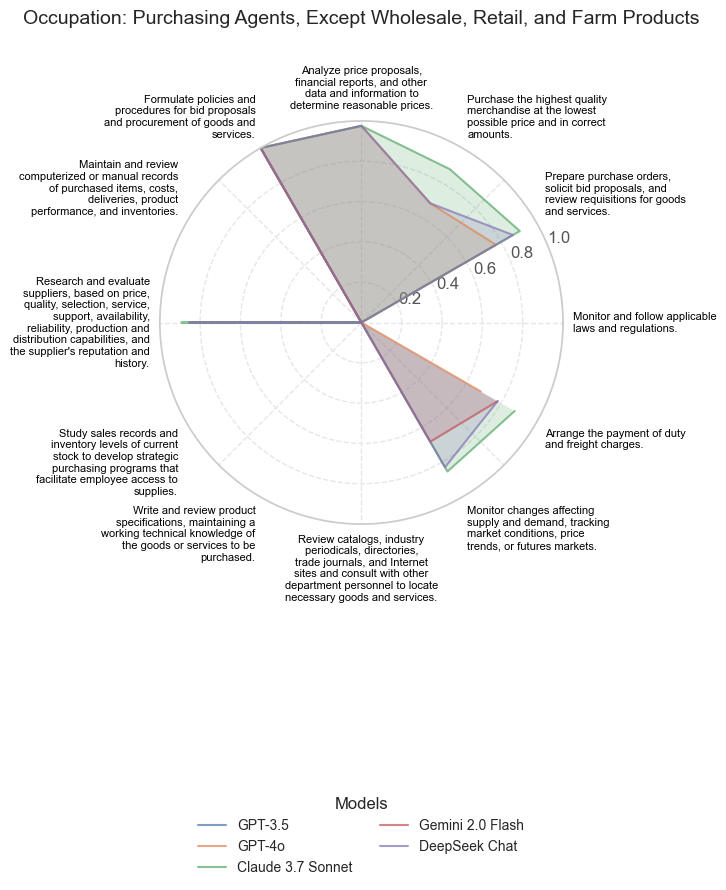

In [294]:


# Assuming df_algorithms contains the task descriptions and model scores
models = ['GPT-3.5', 'GPT-4o', 'Claude 3.7 Sonnet', 'Gemini 2.0 Flash',
       'DeepSeek Chat']# 1. Get unique occupations
#occupations = df['occupation'].unique()
occupations =['Purchasing Agents, Except Wholesale, Retail, and Farm Products']

df_radial_plot = df_radial_plot.fillna(0)
# 2. Create the figure with subplots, one for each occupation
fig, axes = plt.subplots(nrows=len(occupations), figsize=(10, len(occupations) * 5), subplot_kw={'projection': 'polar'})
fig.tight_layout(h_pad=4)

min_scale = df_radial_plot[models].min().min()
max_scale = df_radial_plot[models].max().max()
# Loop through each occupation and create a radial plot for each
for i, occupation in enumerate(occupations):
    print(occupation)
    # Get the data for the current occupation
    occupation_data = df_radial_plot[df_radial_plot['occupation'] == occupation]
    
    # Create an axis for the current subplot (using polar projection)
    ax = axes[i] if len(occupations) > 1 else axes
    
    # Set title for the subplot
    ax.set_title(f"Occupation: {occupation}", fontsize=14, pad=70)

    # Set the number of tasks (this will determine the number of angular divisions)
    num_tasks = len(occupation_data)
    angles = np.linspace(0, 2 * np.pi, num_tasks, endpoint=False)  # Angles for each task
    
    # Loop through each model and plot its data in radial form
    for j, model in enumerate(models):
        scores = occupation_data[model].values  # y-axis (model score)
        scores_normalized = np.interp(scores, (min_scale, max_scale), (0, 1))  # Normalize
        # Plot each model with the filled area
        ax.fill(angles, scores_normalized, alpha=0.2, label='', zorder=1)
        ax.plot(angles, scores_normalized, label=model if i == 0 else "", alpha=0.7)
    
    # Set the angular ticks to be task descriptions
        #ax.set_xticks(angles)
        ax.set_xticklabels([])

    # Split the labels into multiple lines
    new_labels = [split_label(label, max_length=30) for label in occupation_data['task_description']]
    
    # Set the xticklabels only once
    #ax.set_xticklabels(new_labels, fontsize=8, rotation=45, ha='right')

    # Customize tick label alignment based on angle
    for angle, label in zip(angles, new_labels):
        ha, va = get_tick_alignment(angle)  # Get horizontal and vertical alignment based on angle
        ax.text(angle, 1.05, label, horizontalalignment=ha, verticalalignment=va, fontsize=8, color="black", zorder=2)

    ax.set_ylim(0, 1)  # Set radial limits (0 to 1 after normalization)

# Add legend only once (at the end), broken into multiple rows
axes.legend(
    loc='lower center',
    fontsize=10,  # Legend font size
    ncol=2,  # Number of columns in the legend
    title="Models",  # Legend title
    bbox_to_anchor=(.5, -.9)
)
# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [295]:
100*5 + 20*15

800

In [296]:
800/115

6.956521739130435

In [123]:
df_algorithms['task_description']

task_id
12865.0    Collect fees, commissions, or other payments, ...
12883.0    Maintain records of business transactions and ...
21417.0    Examine claims forms and other records to dete...
1158.0     Monitor changes affecting supply and demand, t...
1152.0     Review catalogs, industry periodicals, directo...
1157.0     Write and review product specifications, maint...
1153.0     Study sales records and inventory levels of cu...
1144.0     Research and evaluate suppliers, based on pric...
1151.0     Maintain and review computerized or manual rec...
1159.0     Formulate policies and procedures for bid prop...
1145.0     Analyze price proposals, financial reports, an...
1142.0     Purchase the highest quality merchandise at th...
1143.0     Prepare purchase orders, solicit bid proposals...
1146.0     Monitor and follow applicable laws and regulat...
1155.0      Arrange the payment of duty and freight charges.
66.0       Monitor and analyze sales records, trends, or ...
20713.0    Recom